# Práctica 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Definición de F(x, y)
def F(x, y):
    return (x**2 + y - 10)**2 + (x + y**2 - 12)**2 - 100

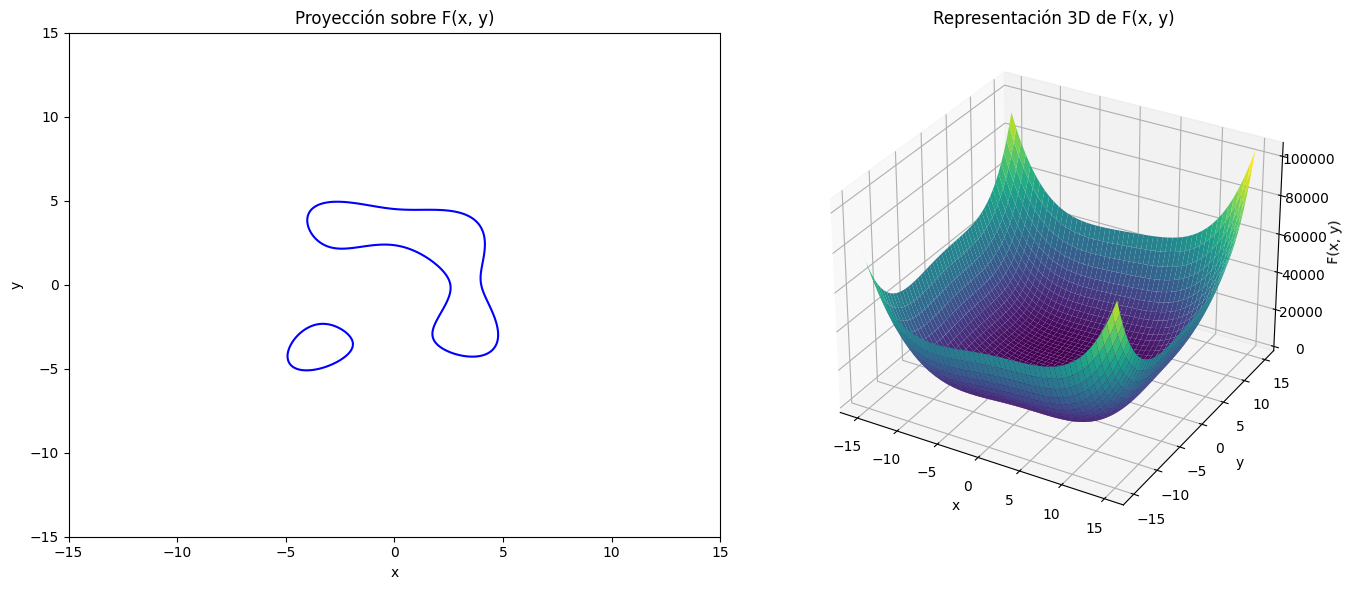

In [ ]:
# Crear un rango de valores para x e y
x = np.linspace(-15, 15, 400)
y = np.linspace(-15, 15, 400)

# Crear una cuadrícula de coordenadas (x, y)
X, Y = np.meshgrid(x, y)

# Calcular los valores de F(x, y) para cada par de coordenadas (x, y)
Z = F(X, Y)

# Crear la figura
fig = plt.figure(figsize=(14, 6))

# Visualización en 2D (Curvas de Contorno)
ax1 = fig.add_subplot(121)
contours = ax1.contour(X, Y, Z, levels=[0], colors='b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Proyección sobre F(x, y)')

# Visualización en 3D (Superficie)
ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('F(x, y)')
ax2.set_title('Representación 3D de F(x, y)')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# Definir los límites del dominio
x_min, x_max = -15, 15
y_min, y_max = -15, 15

# Número de muestras para cada iteración
num_samples_list = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# Área total del dominio
total_area = (x_max - x_min) * (y_max - y_min)

# Inicializar una lista para almacenar las estimaciones de área
area_estimates = []

# Realizar el cálculo del área con diferentes cantidades de muestras
for num_samples in num_samples_list:
    # Generar puntos aleatorios dentro del dominio
    random_x = np.random.uniform(x_min, x_max, num_samples)
    random_y = np.random.uniform(y_min, y_max, num_samples)

    # Contar cuántos puntos caen dentro de la región G
    points_inside_region = sum(F(random_x, random_y) <= 0)

    # Estimar el área utilizando la fracción de puntos dentro de G
    area_estimate = (points_inside_region / num_samples) * total_area
    area_estimates.append(area_estimate)

# Crear un DataFrame
data = {'Muestras': num_samples_list, 'Área Estimada': area_estimates}
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)


# Guardar el DataFrame en un archivo CSV
df.to_csv('estimaciones_area.csv', index=False)

    Muestras  Área Estimada
0        100      18.000000
1       1000      36.900000
2      10000      39.510000
3     100000      38.331000
4    1000000      38.861100
5   10000000      38.756970
6  100000000      38.748663


# Método recursivo

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def F(x, y):
    return (x**2 + y - 10)**2 + (x + y**2 - 12)**2 - 100

def indicator_function(x, y):
    return 1 if F(x, y) <= 0 else 0

def integrate_grid(list_signs, grid):
    x1, x2, y1, y2 = grid
    dx = (x2 - x1) / 2
    dy = (y2 - y1) / 2

    # Calcula el área de cada cuadrícula.
    area = 0.0
    for x_i in x_gauss:
        for y_i in y_gauss:
            # Calcula el punto en la cuadrícula.
            x = x1 + dx * x_i
            y = y1 + dy * y_i

            # Evalúa la función indicadora en el punto.
            list_sign = indicator_function(x, y)

            # Agrega el área de la cuadrícula al área total.
            if list_sign:
                area += list_sign * dx * dy / 4
            else:
                area = 0.0

    return area



In [75]:
import numpy as np
import matplotlib.pyplot as plt

def F(x, y):
    return (x**2 + y - 10)**2 + (x + y**2 - 12)**2 - 100

def indicator_function(x, y):
    return 1 if F(x, y) <= 0 else 0

def integrate_grid(list_signs, grid):
    x1, x2, y1, y2 = grid
    dx = (x2 - x1) / 2
    dy = (y2 - y1) / 2

    # Calcula el área de cada cuadrícula.
    area = 0.0
    for x_i in x_gauss:
        for y_i in y_gauss:
            # Calcula el punto en la cuadrícula.
            x = x1 + dx * x_i
            y = y1 + dy * y_i

            # Evalúa la función indicadora en el punto.
            list_sign = indicator_function(x, y)

            # Agrega el área de la cuadrícula al área total.
            if list_sign:
                area += list_sign * dx * dy / 4
            else:
                area = 0.0

    return area

def integrate_recursive_harmonic(F, grids, depth, method="harmonic"):
    # Termina la recursión si no quedan cuadrículas

    if len(grids) == 0:
        return 0.0

    # Si la profundidad es 0, integra directamente

    if depth == 0:
        area = 0.0
        for grid in grids:
            points = unpack_grid(grid)
            list_signs = [indicator_function(x, y) for x, y in points]
            area += integrate_grid(list_signs, grid)
        return area

    # De lo contrario, divide la cuadrícula actual en cuatro y llama a la función recursivamente

    grid = grids.pop()
    points = unpack_grid(grid)
    list_signs = [indicator_function(x, y) for x, y in points]

    if any(list_signs):
        area = integrate_grid(list_signs, grid) + integrate_recursive_harmonic(
            F, grids, depth
        )
    else:
        # Si la cuadrícula está vacía, la función indicadora devolverá 0 para todos los puntos.
        # En este caso, el área de la cuadrícula es 0.
        area = 0.0
        return area

def unpack_grid(grid):
    x1, x2, y1, y2 = grid
    return [(x1, y1), (x1, y2), (x2, y1), (x2, y2)]

def check_sign_pos(list_signs):
    return all(list_signs)

def check_sign_neg(list_signs):
    return not any(list_signs)

def main():
    grid_extended = []
    x_min, x_max, y_min, y_max = -10, 10, -10, 10
    grids = grid_division((x_min, x_max, y_min, y_max), h=10)
    area = integrate_recursive_harmonic(F, grids, 8, method="harmonic")

    print("El área es:", area)

if __name__ == "__main__":
    main()

El área es: 0.0
